# **Logistic Regression**

## Farazi Musaab Jashim : 1211305294



### 🔹 **Introduction**
This notebook contains two key sections:  

### 1️.  *Understanding Logistic Regression Concepts via Visualization.*
### 2️.  *Real World case : Customer Churn Analysis using Logistic Regression.*


### **📌 Section 1: Visualizing Logistic Regression Concepts**
### 🔹 Why Visualize Logistic Regression?
Logistic Regression is a fundamental classification algorithm.  
This section helps understand:

✔ **Sigmoid Function** → Converts log-odds into probability (`0 to 1`).  
✔ **Logit Function** → Converts probability into log-odds.  
✔ **Decision Boundary** → Separates classes based on probability (`p = 0.5`).  
✔ **Gradient Descent** → Optimizes model coefficients by minimizing the loss function.  
✔ **Maximum likelihodd** → estimate model parameters by maximizing the probability of the observed data.. 

### 🔹 Key Visualizations
📊 **Plotting the Sigmoid Curve** → Understanding probability mapping.  
📊 **Visualizing Decision Boundaries** → How the model classifies churners vs. non-churners.  
📊 **Gradient Descent Convergence** → How the model learns the best weights.

### **📌 Section 2: Customer Churn Prediction**
### 🔹 Overview
Customer churn occurs when customers stop using a service.  
The goal is to **predict whether a customer will churn** using **Logistic Regression**.

### 🔹 Key Steps in Churn Analysis
✅ **Preprocessing:** Handling missing values, encoding categorical data, and feature scaling.  
✅ **Feature Selection:** Using **ANOVA (SelectKBest)** to select the best predictors.  
✅ **Model Training:** Training a **Logistic Regression model** to predict churn (`Exited: 0 or 1`).  
✅ **Evaluation Metrics:** Analyzing **Accuracy, Confusion Matrix, and ROC-AUC Curve**.  
✅ **Insights:** Identifying **important factors influencing customer churn**.



## **🚀 What You’ll Learn**
1️⃣ **How mathematical concepts like Sigmoid and Logit are used in classification.**  
2️⃣ **How Logistic Regression works for real-world churn prediction.**  

👨‍💻 **Let's dive into the analysis!** 🚀


In [319]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectKBest, f_classif
from imblearn.over_sampling import SMOTE
from sklearn import metrics
from sklearn.datasets import make_classification
from sklearn.metrics import roc_curve, auc


## **📌 Section 1: Visualizing Logistic Regression Concepts**

Since we are not using a real-world dataset, we generate synthetic data to demonstrate Logistic Regression concepts.

🔹 Why Generate Synthetic Data?

✔ Allows us to control the complexity of the dataset.

✔ Ensures clear separation between classes (0, 1).

✔ Helps visualize key concepts like decision boundaries, sigmoid function, and logit transformation.

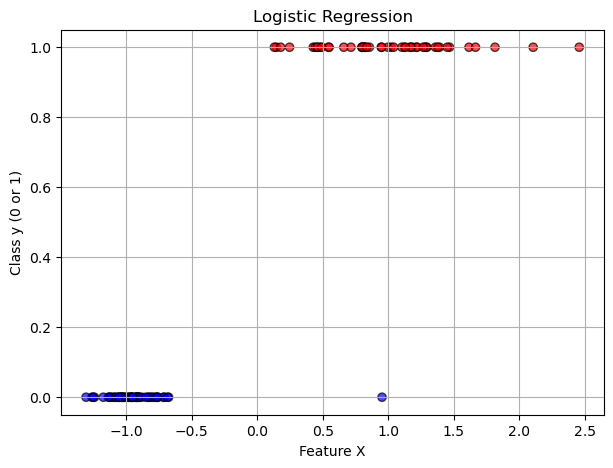

In [320]:
# Generate synthetic binary classification data
np.random.seed(42)
X, y = make_classification(n_samples=100, n_features=1, n_classes=2, n_informative=1,n_clusters_per_class=1, n_redundant=0)

# Scatter plot of the synthetic data
plt.figure(figsize=(7, 5))
plt.scatter(X, y, c=y, cmap='bwr', alpha=0.7, edgecolors='k')
plt.xlabel("Feature X")
plt.ylabel("Class y (0 or 1)")
plt.title("Logistic Regression")
plt.grid()
plt.show()

### 🔹 Why is the Sigmoid Function Used?
In **Logistic Regression**, we need to **map predictions to probabilities**.  
Since probabilities must be between **0 and 1**, we cannot use a **straight-line equation** (like in Linear Regression).  
Instead, we use the **sigmoid function**, which is **S-shaped** and forces all values into the `[0,1]` range.

✅ **Why is this important?**  
✔ Ensures that model outputs can be interpreted as probabilities.  
✔ Allows for a **decision boundary** where predictions change from one class to another.  
✔ Helps in **binary classification problems** like predicting the probability of instance belonging to the positive class **(1)**.

---

### 🔹 Sigmoid Function Formula
The sigmoid function is mathematically defined as:

$$\sigma(x) = \frac{1}{1+\frac{1}{e^x}} = \frac{1}{1+e^{-x}}$$

Where:
- **\( z \)** is a linear combination of input features: $$z = \theta_0 + \theta_1 x_1 + \theta_2 x_2 + \ldots + \theta_n x_n$$
  
- \( e \) is the natural exponential constant (~2.718).  
- The function **compresses all inputs** into a probability range `[0,1]`.

✅ **Key Takeaways**:  
✔ The **sigmoid curve** ensures smooth probability predictions.  
✔ The **decision boundary** occurs at `z = 0`, where probability = `0.5`.

---

### 🔹 Key Properties of the Sigmoid Function
| **Property** | **Explanation** |
|-------------|---------------|
| **Range** | The function outputs values **between `0` and `1`**. |
| **S-Shaped Curve** | The sigmoid function smoothly transitions from **low to high values**. |
| **Threshold at 0.5** | Values **≥0.5** → Predicted as **Class 1**, Values **<0.5** → Predicted as **Class 0**. |
| **Non-Linear Transformation** | Converts raw feature values into probabilities. |


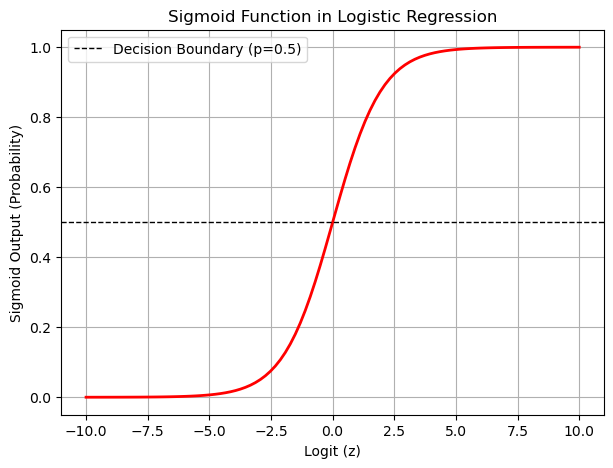

In [321]:
# Define sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Generate range for z values
z = np.linspace(-10, 10, 100)
sigmoid_values = sigmoid(z)

# Plot sigmoid function
plt.figure(figsize=(7, 5))
plt.plot(z, sigmoid_values, color='red', linewidth=2)
plt.axhline(y=0.5, color='black', linestyle='--', linewidth=1, label="Decision Boundary (p=0.5)")
plt.xlabel("Logit (z)")
plt.ylabel("Sigmoid Output (Probability)")
plt.title("Sigmoid Function in Logistic Regression")
plt.grid()
plt.legend()
plt.show()


### 🔹 Why is the Logit Function Important?
The **logit function** is the **inverse of the sigmoid function** and is used in **Logistic Regression** to convert probabilities into log-odds.

✅ **Why do we need it?**  
- The logit function ensures that logistic regression behaves **linearly** in terms of log-odds.  
- It helps estimate **how feature values influence the probability of an event occurring** (e.g., churn prediction).  
- Unlike probabilities (which are limited between `0` and `1`), log-odds can take **any real number (`-∞` to `+∞`)**.  

📌 **Key Idea:**  
✔ The **Sigmoid function** maps values from **log-odds → probability `[0,1]`**.  
✔ The **Logit function** reverses this, mapping **probability `[0,1]` → log-odds `(-∞, +∞)`**.

---

### 🔹 Logit Function Formula
The **logit function** is mathematically defined as:

$$
\text{logit}(p) = \log \left( \frac{p}{1 - p} \right)
$$

Where:  
- **$ p $** is the probability of an event occurring (**churn** in our case).  
- **$ \frac{p}{1 - p} $** is the **odds ratio** (how likely churn is compared to staying).  
- **$ \log $** is the **natural logarithm (ln)**, which expands values from `0 to 1` into `-∞ to +∞`.

✅ **Why is this important?**  
✔ The logit function **converts probabilities into a continuous scale**, making predictions more interpretable.  
✔ Unlike probabilities (which are restricted to `[0,1]`), log-odds can take **any real number**.  
✔ Helps create a **linear relationship between input features and churn probability**.


---

### 🔹 Understanding Log-Odds
In Logistic Regression, we use **log-odds** instead of raw probabilities.

$$
\text{Odds} = \frac{p}{1 - p}
$$

✅ **How to interpret odds?**  
- If $ p = 0.5 $, the odds are **1** (event is equally likely to happen or not).  
- If $ p = 0.8 $, the odds are **4** (event is **4 times more likely** to happen than not).  
- If $ p = 0.1 $, the odds are **0.11** (event is **10 times less likely** to happen than not).  

📌 **Logit Function and Log-Odds**  
The **logit function** takes the logarithm of the odds:

$$
\text{logit}(p) = \log \left( \frac{p}{1 - p} \right)
$$

✔ **This makes the relationship between features and log-odds linear**.  
✔ **Logit ensures that changes in input features affect the model consistently**.

---

### 🔹 Why is the Logit Function Useful?
| **Concept** | **Explanation** |
|------------|---------------|
| **Converts Probabilities to Log-Odds** | Expands probability scale `[0,1]` into **continuous values** `(-∞, +∞)`. |
| **Used in Logistic Regression** | Helps model the relationship between features and class probability. |
| **Linearizes Relationships** | Ensures that changes in feature values have a consistent effect on log-odds. |
| **Inverse of Sigmoid** | While **Sigmoid maps log-odds to probabilities**, **Logit maps probabilities to log-odds**. |



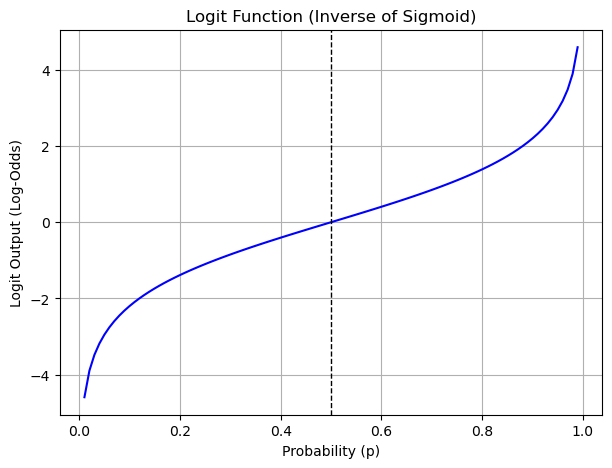

In [316]:
# Define logit function
def logit(p):
    return np.log(p / (1 - p))

# Generate probabilities from 0.01 to 0.99 (Avoiding 0 and 1)
p_values = np.linspace(0.01, 0.99, 100)
logit_values = logit(p_values)

# Plot logit function
plt.figure(figsize=(7, 5))
plt.plot(p_values, logit_values, color='blue')
plt.axvline(x=0.5, color='black', linestyle='--', linewidth=1)  # Decision boundary
plt.xlabel("Probability (p)")
plt.ylabel("Logit Output (Log-Odds)")
plt.title("Logit Function (Inverse of Sigmoid)")
plt.grid()
plt.show()


### 🔹 Decision Boundary in Logistic Regression
In **Logistic Regression**, the **decision boundary** is the threshold that separates two classes.  
It is based on the **sigmoid function**, which outputs probabilities between `0` and `1`.

---

### **✅ How is the Decision Boundary Defined?**
Logistic Regression makes predictions using:

$$
p = \frac{1}{1 + e^{-z}}
$$

Where:

$$
z = w_0 + w_1 x_1 + w_2 x_2 + ... + w_n x_n
$$

✔ The **decision boundary** occurs where probability **$ p = 0.5 $**,  
✔ This means the model predicts **Class 1 ** if:

$$
z \geq 0  \quad \text{(or equivalently, } p \geq 0.5 \text{)}
$$

✔ If **$ z < 0 $**, the model predicts **Class 0 (Stay)**.

---

### **✅ Visualizing the Decision Boundary**
- When using **one feature** (`x`), the decision boundary is a **single threshold** .
- When using **two features** (`x1, x2`), the decision boundary is a **line**.
- When using **multiple features**, the boundary becomes a **hyperplane** in higher dimensions.

---

### **✅ Example: Linear vs. Non-Linear Boundaries**
✔ If features are **linearly separable**, the decision boundary is a **straight line**.  
✔ If features **overlap**, Logistic Regression may struggle, and **non-linear models** (e.g., Neural Networks, SVMs) may perform better.

📌 **Key Takeaway:**  
The decision boundary **defines the threshold where the model changes predictions**, helping to classify data into `0` (Stay) and `1` (Churn).


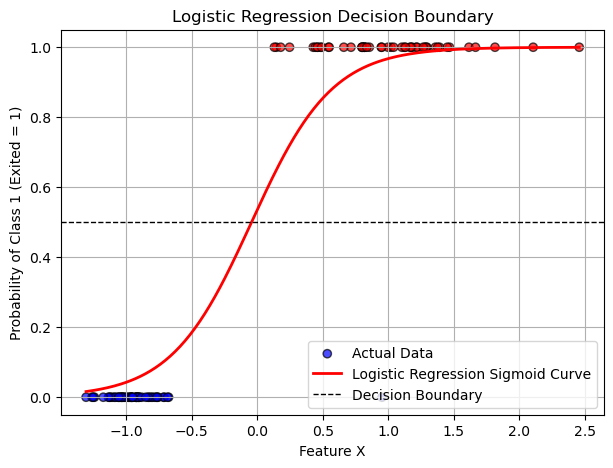

In [317]:
# Train logistic regression model
model = LogisticRegression()
model.fit(X, y)

# Generate range of X values for prediction
X_range = np.linspace(X.min(), X.max(), 300).reshape(-1, 1)
y_prob = model.predict_proba(X_range)[:, 1]  # Get probabilities for class 1

# Plot decision boundary
plt.figure(figsize=(7, 5))
plt.scatter(X, y, c=y, cmap='bwr', alpha=0.7, edgecolors='k', label="Actual Data")
plt.plot(X_range, y_prob, color='red', linewidth=2, label="Logistic Regression Sigmoid Curve")
plt.axhline(y=0.5, color='black', linestyle='--', linewidth=1, label="Decision Boundary")
plt.xlabel("Feature X")
plt.ylabel("Probability of Class 1 (Exited = 1)")
plt.title("Logistic Regression Decision Boundary")
plt.legend()
plt.grid()
plt.show()


### 🔹 Gradient Descent in Logistic Regression

### **✅ What is Gradient Descent?**
Gradient Descent is an **optimization algorithm** used to minimize the **cost function** in Logistic Regression.  
It **iteratively updates model parameters (`w`)** to find the best decision boundary.

📌 **Why is it needed?**  
✔ The goal of Logistic Regression is to find the **optimal weights (`w`)** that minimize the model’s error.  
✔ Since the cost function in Logistic Regression is **non-linear**, we need an iterative method like **Gradient Descent** to optimize it.  
✔ Gradient Descent helps **adjust weights step-by-step** to improve predictions.

---

### **✅ Cost Function in Logistic Regression**
To train the model, we minimize the **Log Loss (Cross-Entropy Loss)**:

$$
J(w) = - \frac{1}{m} \sum_{i=1}^{m} \left[ y_i \log(\hat{y}_i) + (1 - y_i) \log(1 - \hat{y}_i) \right]
$$

Where:
- **$ y_i $** → Actual class label (`0` or `1`).
- **$ \hat{y}_i $** → Predicted probability from the sigmoid function.
- **$ m $** → Total number of training samples.

📌 **Why Log Loss?**  
✔ Encourages the model to **correctly classify each sample** with the highest probability.  
✔ Penalizes incorrect predictions more when they are **confidently wrong**.

---

### **✅ How Gradient Descent Works**
Gradient Descent follows these steps:

1️⃣ **Initialize random weights (`w`) and bias (`b`)**.  
2️⃣ **Compute the predictions** using the sigmoid function:

$$
\hat{y} = \frac{1}{1 + e^{-z}}, \quad z = w_0 + w_1 x_1 + ... + w_n x_n
$$

3️⃣ **Calculate the cost function** (`J(w)`) to measure model performance.  
4️⃣ **Compute the gradient (derivative) of the cost function**:

$$
\nabla J(w) = \frac{1}{m} \sum_{i=1}^{m} ( \hat{y}_i - y_i ) x_i
$$

5️⃣ **Update the weights (`w`) using the learning rate (`α`)**:

$$
w := w - \alpha \nabla J(w)
$$

6️⃣ **Repeat until convergence** (when weight updates become very small).

---

### **✅ Choosing the Right Learning Rate (`α`)**
| **Learning Rate (`α`)** | **Effect** |
|------------------|------------------|
| **Too Small (`0.0001`)** | Converges **very slowly**, taking too many steps. |
| **Too Large (`1.0`)** | May **overshoot the minimum** and never converge. |
| **Optimal (`0.01 - 0.1`)** | Converges **efficiently** to the best solution. |

📌 **Key Insight:**  
✔ A properly tuned learning rate ensures **fast and stable convergence**.

---

### **✅ Types of Gradient Descent**
| **Type** | **Description** | **Best Used When** |
|----------|---------------|------------------|
| **Batch Gradient Descent** | Uses **all** training samples per update. | Dataset is **small**, and computation is manageable. |
| **Stochastic Gradient Descent (SGD)** | Updates **one sample at a time** (randomly chosen). | Dataset is **large**, provides faster updates. |
| **Mini-Batch Gradient Descent** | Updates using **small batches of samples**. | Balances **speed** and **stability**, widely used in practice. |

📌 **Which one is better?**  
✔ **Batch GD** → More accurate but slow.  
✔ **SGD** → 


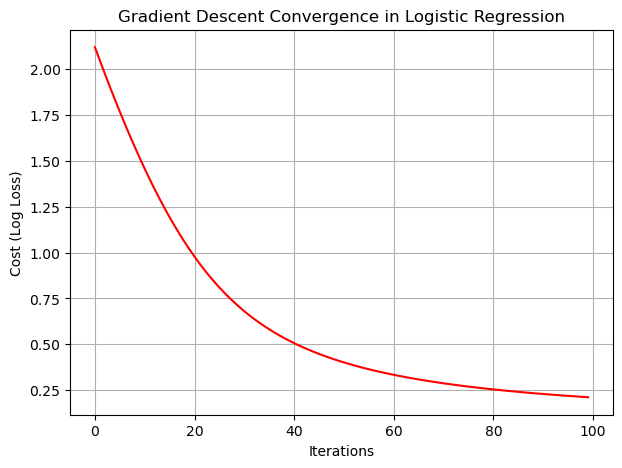

In [318]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification

# Generate synthetic binary classification data
np.random.seed(42)
X, y = make_classification(n_samples=100, n_features=1, n_classes=2, 
                           n_clusters_per_class=1, n_informative=1, n_redundant=0)

# Initialize weights and learning rate
w = np.random.randn(1)
b = np.random.randn(1)
alpha = 0.1  # Learning rate
iterations = 100
m = len(y)  # Number of samples
cost_history = []  # Store cost function values

# Sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Gradient Descent
for i in range(iterations):
    # Compute predictions
    z = np.dot(X, w) + b
    y_hat = sigmoid(z)
    
    # Compute cost (Log Loss)
    cost = (-1/m) * np.sum(y * np.log(y_hat) + (1 - y) * np.log(1 - y_hat))
    cost_history.append(cost)

    # Compute gradients
    dw = (1/m) * np.dot(X.T, (y_hat - y))
    db = (1/m) * np.sum(y_hat - y)
    
    # Update weights
    w -= alpha * dw
    b -= alpha * db

# Plot cost function over iterations
plt.figure(figsize=(7,5))
plt.plot(range(iterations), cost_history, color='red')
plt.xlabel("Iterations")
plt.ylabel("Cost (Log Loss)")
plt.title("Gradient Descent Convergence in Logistic Regression")
plt.grid()
plt.show()


## 📌 Understanding Maximum Likelihood Estimation (MLE) in Logistic Regression
Maximum Likelihood Estimation (MLE) is the core optimization technique used to train Logistic Regression models.

## 🔹 Maximum Likelihood Estimation (MLE) in Logistic Regression

### **✅ 1. What is Maximum Likelihood Estimation (MLE)?**
Maximum Likelihood Estimation (MLE) is a **statistical method** used to estimate model parameters by **maximizing the probability** of the observed data.

📌 **In Logistic Regression, MLE finds the optimal weights (`w`) that make the observed data most likely.**  
✔ Instead of minimizing an error function (like in Linear Regression), MLE **maximizes the probability** of correctly classifying each sample.  

---

### **✅ 2. Likelihood Function in Logistic Regression**
For a given dataset **$X$** with **$m$ samples**, each sample has:
- **Features**: **$X = (x_1, x_2, ... , x_n)$**  
- **Class Labels**: **$y = (0 \text{ or } 1)$**  
- **Model Predictions**: **$p = \sigma(z) = \frac{1}{1 + e^{-z}}$**, where **$z = w_0 + w_1 x_1 + ... + w_n x_n$**.

📌 **The likelihood function ($L$) represents the probability of the observed data given the parameters ($w$):**  

$$
L(w) = \prod_{i=1}^{m} p_i^{y_i} (1 - p_i)^{(1 - y_i)}
$$

Where:
- **$p_i = \sigma(z_i)$** is the probability of **Class 1** for sample **$i$**.  
- **$y_i = 1$** → The term **$p_i$** remains (we keep the probability of Class 1).  
- **$y_i = 0$** → The term **$(1 - p_i)$** remains (we take the probability of Class 0).  

---

### **✅ 3. Log-Likelihood Function (Why Take the Log?)**
Instead of maximizing **$L(w)$**, we take the **logarithm** to simplify calculations:  

$$
\log L(w) = \sum_{i=1}^{m} \left[ y_i \log(p_i) + (1 - y_i) \log(1 - p_i) \right]
$$

📌 **Why use Log-Likelihood instead of Likelihood?**  
✔ **Simplifies multiplication into addition**, making differentiation easier.  
✔ **Numerically stable**, avoiding very small numbers from multiplying.  
✔ Helps find **optimal weights** by using **Gradient Descent**.

---

### **✅ 4. Optimization: Maximizing the Log-Likelihood**
To find the **best weights ($w$) for Logistic Regression**, we **maximize the log-likelihood function**.

📌 **How do we maximize log-likelihood?**  
✔ **Take the derivative** of the log-likelihood function w.r.t **$w$**.  
✔ Use **Gradient Descent** to iteratively adjust **$w$** until **convergence**.  

The **gradient (derivative) of log-likelihood** is:

$$
\nabla J(w) = \frac{1}{m} \sum_{i=1}^{m} ( \hat{y}_i - y_i ) x_i
$$

✔ **Gradient Descent updates the weights as:**
$$
w := w - \alpha \nabla J(w)
$$
✔ The model stops updating when **log-likelihood is maximized**.

---

### **✅ 5. How MLE Relates to Logistic Regression?**
| **Concept** | **Explanation** |
|------------|---------------|
| **Likelihood Function** | Measures how well the parameters (`w`) explain the observed data. |
| **Log-Likelihood** | Converts multiplication into summation for easier optimization. |
| **Maximization** | Uses **Gradient Descent** to find the best parameters. |
| **Final Model** | The best `w` values **maximize the probability** of correct classifications. |

📌 **Why does this matter?**  
✔ **MLE helps Logistic Regression find the most probable decision boundary.**  
✔ **Ensures that model predictions match observed labels as closely as possible.**  
✔ **Provides a probabilistic foundation** for classification problems.




## **📌 Section 2: Customer Churn Prediction**
Customer churn occurs when customers stop using a service.  

This dataset is for XYZ Multistate Bank and contains 18 columns that capture key aspects of customer behavior and attributes. Each column provides valuable insights into the factors influencing customer churn, with the goal of predicting which customers are most likely to leave the bank. Below is the description of each column.

1. **RowNumber** :
The "RowNumber" column corresponds to the unique record number for each customer entry.
2. **CustomerId**:
The "CustomerId" column consists of randomly generated identifiers for each customer.
3. **Surname**:
The "Surname" column holds the last names of customers.
4. **CreditScore**:
"CreditScore" is an important variable that can significantly affect customer churn. Customers with higher credit scores are generally considered more financially stable and less likely to leave the bank
5. **Geography**:
"Geography" refers to the geographical location of the customer, 
6. **Gender**:
"Gender" column tells us if the customer is male or female
7. **Age**:
The "Age" column ewcords the age of the customer
8. **Tenure**:
"Tenure" refers to the number of years a customer has been with the bank.
9. **Balance**:
The "Balance" column reflects the amount of money a customer holds in their bank account.
10. **NumOfProducts**:
"NumOfProducts" refers to the number of products (e.g., savings accounts, loans, credit cards) that a customer has with the bank. 
11. **HasCrCard**:
"HasCrCard" indicates whether or not a customer holds a credit card with the bank.
12. **IsActiveMember**:
The "IsActiveMember" column indicates whether a customer actively engages with the bank's services.
13. **EstimatedSalary**:
"EstimatedSalary" represents the customer’s estimated annual salary.
14. **Exited**:
The "Exited" column is the target variable in the dataset, indicating whether a customer has left the bank (1) or remained (0).
15. **Complain**:
The "Complain" column shows whether or not a customer has filed a complaint with the bank.
16. **Satisfaction Score**:
The "Satisfaction Score" represents how satisfied a customer is with the bank's complaint resolution process. 
17. **Card Type**:
"Card Type" refers to the type of credit card a customer holds, such as a standard, premium, or rewards card. 
18. **Points Earned**:
"Points Earned" shows the loyalty points a customer has accumulated through the use of their credit card. 

In [265]:
df = pd.read_csv('Bank-Customer-Attrition-Insights-Data.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15598695,Fields,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15649354,Johnston,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15737556,Vasilyev,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15671610,Hooper,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15625092,Colombo,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


### **data exploration**

we explore the dataset and get an idea about the idea

In [172]:
# Display basic information
print("Dataset Shape:", df.shape)
print("\nData Info:")
print(df.info())


Dataset Shape: (10000, 18)

Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   RowNumber           10000 non-null  int64  
 1   CustomerId          10000 non-null  int64  
 2   Surname             10000 non-null  object 
 3   CreditScore         10000 non-null  int64  
 4   Geography           10000 non-null  object 
 5   Gender              10000 non-null  object 
 6   Age                 10000 non-null  int64  
 7   Tenure              10000 non-null  int64  
 8   Balance             10000 non-null  float64
 9   NumOfProducts       10000 non-null  int64  
 10  HasCrCard           10000 non-null  int64  
 11  IsActiveMember      10000 non-null  int64  
 12  EstimatedSalary     10000 non-null  float64
 13  Exited              10000 non-null  int64  
 14  Complain            10000 non-null  int64  
 15  Satisfaction Sc

In [173]:
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
RowNumber             0
CustomerId            0
Surname               0
CreditScore           0
Geography             0
Gender                0
Age                   0
Tenure                0
Balance               0
NumOfProducts         0
HasCrCard             0
IsActiveMember        0
EstimatedSalary       0
Exited                0
Complain              0
Satisfaction Score    0
Card Type             0
Point Earned          0
dtype: int64


In [260]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Point Earned
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203800,0.204400,3.013800,606.515100
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402842,0.403283,1.405919,225.924839
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000,0.000000,1.000000,119.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000,0.000000,2.000000,410.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000,0.000000,3.000000,605.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000,0.000000,4.000000,801.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000,1.000000,5.000000,1000.000000


Remove unnecessary columns.The first 3 columns has no relevance to the churn analysis

In [266]:
columns = ['RowNumber', 'CustomerId', 'Surname']
df = df.drop(columns,axis=1)
df.head(10)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425
5,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1,1,5,DIAMOND,484
6,822,France,Male,50,7,0.00,2,1,1,10062.80,0,0,2,SILVER,206
7,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1,1,2,DIAMOND,282
8,501,France,Male,44,4,142051.07,2,0,1,74940.50,0,0,3,GOLD,251
9,684,France,Male,27,2,134603.88,1,1,1,71725.73,0,0,3,GOLD,342


In [267]:
df.shape

(10000, 15)

In [112]:
df.dtypes

CreditScore             int64
Geography              object
Gender                 object
Age                     int64
Tenure                  int64
Balance               float64
NumOfProducts           int64
HasCrCard               int64
IsActiveMember          int64
EstimatedSalary       float64
Exited                  int64
Complain                int64
Satisfaction Score      int64
Card Type              object
Point Earned            int64
dtype: object

Exited
0    7962
1    2038
Name: count, dtype: int64


<Axes: xlabel='Exited'>

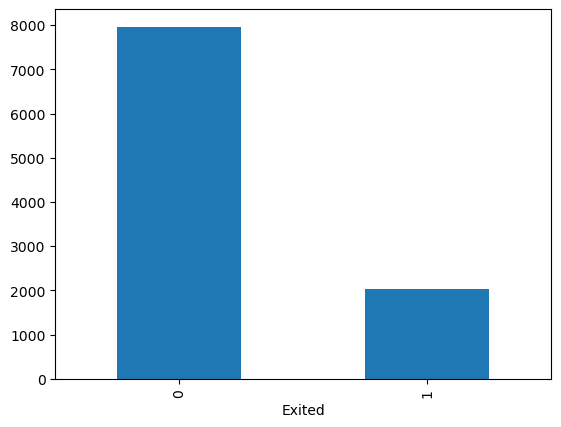

In [232]:
print(df["Exited"].value_counts())
df["Exited"].value_counts().plot(kind="bar")

we get to see the target variable is *Exited* is imbalanced i.e the class 1(left the bank) is in lower proportions.Balancing the target variable in classification problems is crucial because imbalanced data can lead to biased models that perform poorly on the minority class.

# **1.Data splitting**

Data is split into training and test sets.80% of the data is used as training data and 20% is used as testing data.
All the columns are used as the feature.

### Why Using 80% Training and 20% Testing Data is a Good Practice?

**1. Sufficient Training Data for Learning** The 80% training data provides the model with enough examples to learn patterns and relationships in the dataset.
More training data helps the model generalize better and avoid underfitting.

**2. Reliable Testing for Performance Evaluation**
The 20% testing data serves as a completely unseen dataset to evaluate the model’s performance.
Helps assess how well the model generalizes to new data instead of memorizing training examples (avoiding overfitting).

**3. Works Well for Most Datasets**
80-20 split is a standard heuristic that works well across different dataset sizes.
For very large datasets, we can use 70-30 or 90-10 splits based on data availability.

In [268]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

X = df.drop(columns =["Exited"])
y = df['Exited']

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## **2.Numerical Data normalization**

normalization ensures that all numerical features contribute fairly to the model, preventing certain features from dominating others and improving performance.


### Why is Normalizing Numerical Data Important in Logistic Regression?

### **1. Prevents One Feature from Dominating Others**
Logistic Regression predicts outcomes using:

$$
z = w_0 + w_1 x_1 + w_2 x_2 + ... + w_n x_n
$$

- If features have **different scales** (e.g., `age = 30`, `income = 50,000`), the model may assign **more importance** to larger-valued features, even if they are not more predictive.
- **Min-Max Normalization** ensures all features contribute **fairly** to the decision boundary.

---

### **2. Improves Gradient Descent Convergence**
Gradient Descent updates weights iteratively:

$$
w := w - \alpha \nabla J(w)
$$

- Features with large values slow down learning, causing **unstable weight updates**.
- **Min-Max Normalization** scales values between `[0,1]`, making optimization **faster and smoother**.

**Formula for Min-Max Normalization:**
$$
X' = \frac{X - X_{min}}{X_{max} - X_{min}}
$$

---

### **3. Helps Probability Estimation with Sigmoid Function**
Logistic Regression uses the **sigmoid function**:

$$
\sigma(z) = \frac{1}{1 + e^{-z}}
$$

- Large feature values can push **$z$** too high or too low, causing extreme probability outputs (`0` or `1` too quickly).
- **Min-Max Normalization** keeps values in a **stable range**, improving probability estimation.

---

### **4. Creates a More Interpretable Decision Boundary**
- Normalized features produce **more comparable weights (`w`)**, making the model easier to interpret.
- Prevents **one feature from overpowering others**, ensuring a **balanced decision boundary**.




In [269]:
from sklearn.preprocessing import MinMaxScaler

num_attributes = X.select_dtypes(['int64','float64']).columns
# Initialize the scaler
min_max_scaler = MinMaxScaler()

# Fit on training data and transform `x_train`
x_train[num_attributes] = min_max_scaler.fit_transform(x_train[num_attributes])

# Transform `x_test` using the same scaler (DO NOT FIT AGAIN!)
x_test[num_attributes] = min_max_scaler.transform(x_test[num_attributes])

# Verify transformation
print("Scaled Training Data:\n", x_train.shape)
print("Scaled Test Data:\n", x_test.shape)


Scaled Training Data:
 (8000, 14)
Scaled Test Data:
 (2000, 14)


## **3.Categorical Data encoding**

### Why is Encoding Categorical Variables Necessary?
Machine learning models require numerical input, so categorical variables must be converted into numbers before training.

**Why Two Separate Encoding Methods?**

1.Label Encoding (LabelEncoder) → Used for ordinal categories ('Card Type').

- Converts categories into integer values (0, 1, 2,...).
- Suitable when the feature has an inherent order or fewer unique values.

2️.One-Hot Encoding (get_dummies) → Used for nominal categories ('Geography', 'Gender').

- Creates separate binary columns (1 or 0) for each category.
- Prevents the model from misinterpreting categorical relationships.


In [270]:
from sklearn.preprocessing import LabelEncoder

label_cols = ['Card Type']
onehot_cols = ['Geography', 'Gender']

# Initialize LabelEncoder
le = LabelEncoder()

# Apply Label Encoding to 'Card Type' on both `x_train` & `x_test`
for col in label_cols:
    x_train[col] = le.fit_transform(x_train[col])  # Fit & Transform on training
    x_test[col] = le.transform(x_test[col])  # Only Transform on testing

# Apply One-Hot Encoding to categorical features in `x_train`
x_train = pd.get_dummies(x_train, columns=onehot_cols, dtype=int)

# Apply One-Hot Encoding to `x_test` (Must have same columns as `x_train`)
x_test = pd.get_dummies(x_test, columns=onehot_cols, dtype=int)

# Ensure `x_test` has the same columns as `x_train` (Add missing columns)
missing_cols = set(x_train.columns) - set(x_test.columns)
for col in missing_cols:
    x_test[col] = 0  # Add missing columns with zero values

# Ensure `x_test` columns match `x_train` order
x_test = x_test[x_train.columns]


For the current dataset, we have both numerical and categorical attributes. Therefore, we need to use **SMOTENC**, which requires the normalized numerical data, and also need to explicitly specify the index of the categorical columns. The following code extracts the indices of categorical columns and then normalizes the numerical values:



In [271]:
cat_attributes = X.select_dtypes(['object']).columns
cat_index = []
for i in cat_attributes:
  cat_index.append(X.columns.get_loc(i))  
display(cat_index)

[1, 2, 12]

## **4.Data balance**


**Understanding SMOTENC and Its Use in Data Balancing**

**SMOTENC** (Synthetic Minority Over-sampling Technique for Nominal and Continuous features) is an advanced resampling technique used to handle imbalanced datasets when both categorical and numerical features are present.

**What Does SMOTENC Do?**

- Generates synthetic samples for the minority class by interpolating numerical features and sampling categorical values based on their nearest neighbors.
- Unlike standard SMOTE, SMOTENC recognizes categorical features and ensures they are not averaged like numerical features.
- Uses the categorical_features parameter (cat_index) to distinguish categorical columns from numerical ones.

**Why is SMOTENC Useful Here?**

- Handles class imbalance → Prevents the model from being biased toward the majority class.
- Maintains categorical integrity → Ensures new synthetic samples have realistic category values.
- Improves generalization → Helps the model learn from both classes equally, reducing misclassification.

In [272]:
from imblearn.over_sampling import SMOTENC

# Apply SMOTENC using the `cat_index` obtained in Step 4
ovr_samp = SMOTENC(random_state=0, categorical_features=cat_index)

# Resample the training data
x_train_resampled, y_train_resampled = ovr_samp.fit_resample(x_train, y_train)

# Convert back to DataFrame with correct column names
x_train = pd.DataFrame(x_train_resampled, columns=x_train.columns)
y_train = y_train_resampled  # Keep the resampled labels

# Verify that x_train shape is updated
print(f"Shape of x_train after SMOTENC: {x_train.shape}")
print(f"Shape of y_train after SMOTENC: {y_train.shape}")


Shape of x_train after SMOTENC: (12710, 17)
Shape of y_train after SMOTENC: (12710,)


In [273]:
y_train.value_counts()

Exited
0    6355
1    6355
Name: count, dtype: int64

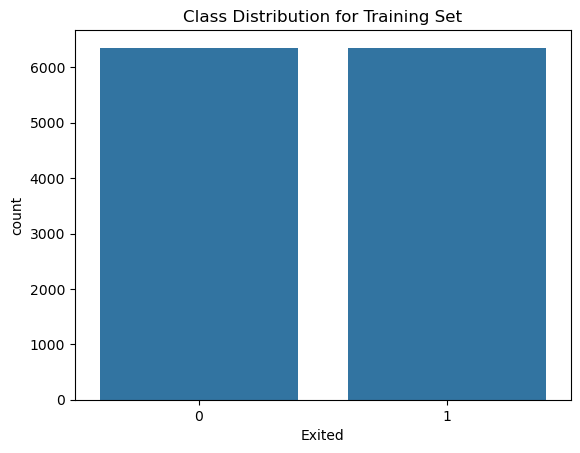

In [274]:
plt.figure()
sns.countplot(x='Exited', data = pd.DataFrame(data=y_train,columns=['Exited']))
plt.title('Class Distribution for Training Set')
plt.show()

As you can see both the classes now have equal samples.Hopefully this will reduce bias of the logistic model.

## **5.Feature Selection**

ANOVA feature selection improves model efficiency and reliability by selecting only the most impactful features.

Steps
- Initialize ANOVA Selector → Use SelectKBest(like k nearest neighbor) to evaluate all features.
- Fit to Training Data → Compute F-scores to measure feature importance.
- Store Feature Scores → Save F-scores in a Pandas Series for ranking.
- Sort and Select → Pick the top 8 features with the highest scores.


In [275]:
anova_selector = SelectKBest(score_func=f_classif, k='all')
anova_selector.fit(x_train, y_train)
anova_scores = pd.Series(anova_selector.scores_, index=x_train.columns)
selected_features = anova_scores.sort_values(ascending=False).index[:8]
print("\nSelected Features Based on Anova:\n", selected_features)


Selected Features Based on Anova:
 Index(['Complain', 'Age', 'IsActiveMember', 'Geography_Germany', 'Balance',
       'Gender_Male', 'Gender_Female', 'Geography_France'],
      dtype='object')


In [276]:
x_train_selected = x_train[selected_features]
x_test_selected = x_test[selected_features]

In [277]:
print(x_train_selected.columns)
print(x_test_selected.columns)

Index(['Complain', 'Age', 'IsActiveMember', 'Geography_Germany', 'Balance',
       'Gender_Male', 'Gender_Female', 'Geography_France'],
      dtype='object')
Index(['Complain', 'Age', 'IsActiveMember', 'Geography_Germany', 'Balance',
       'Gender_Male', 'Gender_Female', 'Geography_France'],
      dtype='object')


## **6.fiiting the model**

- we use the subset of training data consisting the features selected by ANNOVA
- we use the 'saga' solver here as it is better suited for larger datasets

In [278]:
model_log = LogisticRegression(solver='saga', max_iter=1000, random_state=42)
model_log.fit(x_train_selected, y_train)

LogisticRegression(max_iter=1000, random_state=42, solver='saga')

In [279]:
y_pred_log = model_log.predict(x_test_selected)


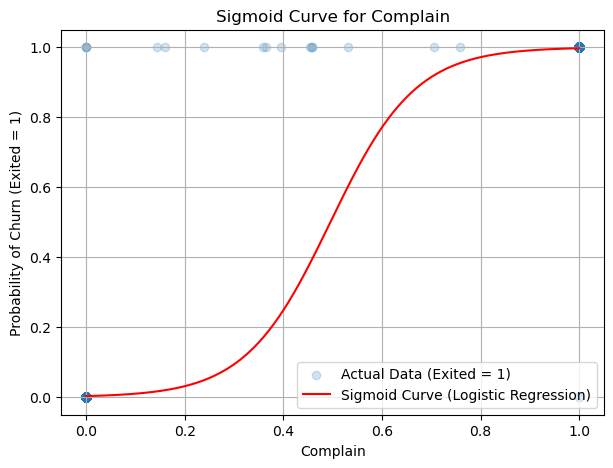

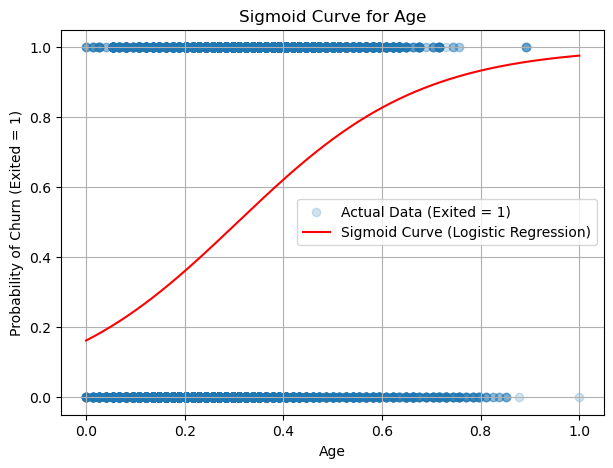

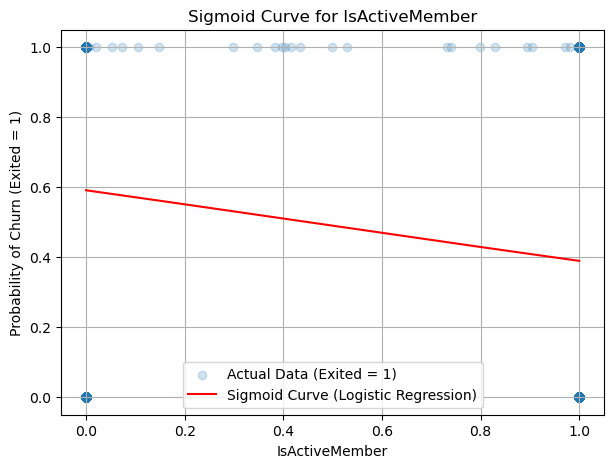

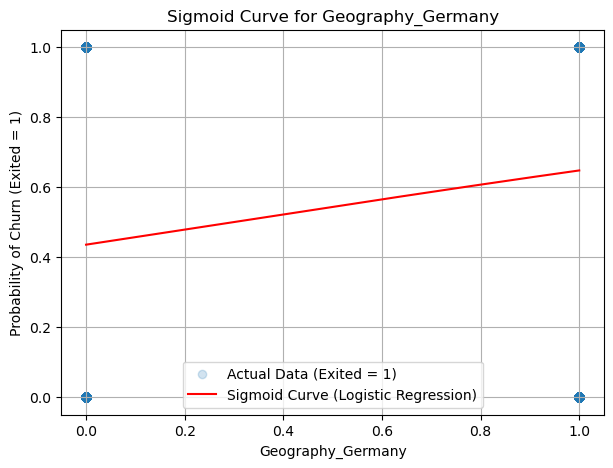

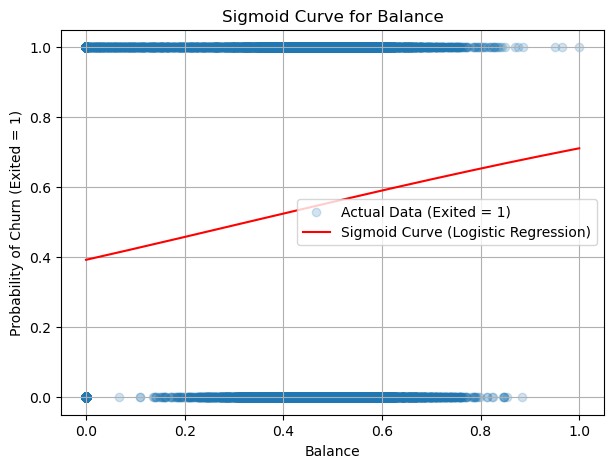

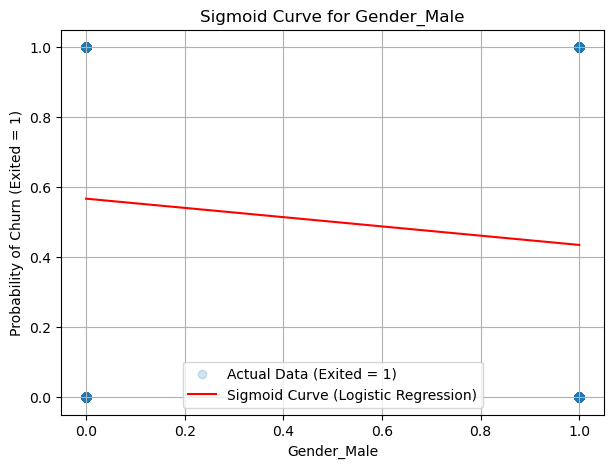

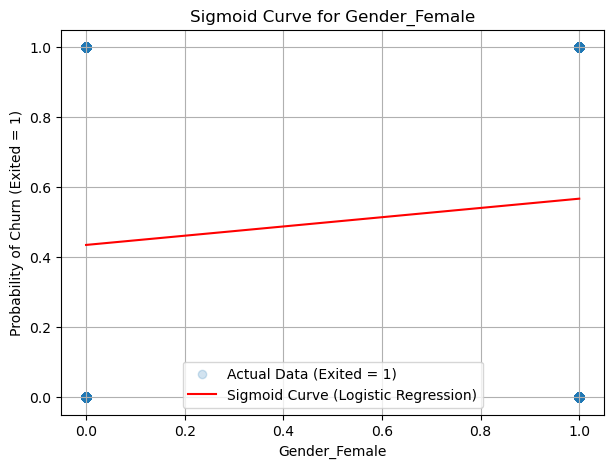

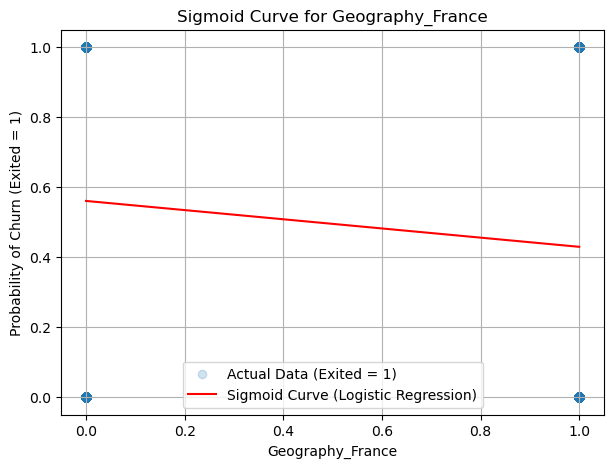

In [305]:
# Loop through each selected feature
for feature in selected_features:  # Selected features from ANOVA
    X_feature = x_train_selected[[feature]].values.reshape(-1, 1)  # Extract single feature
    
    # Train a new logistic regression model on only this feature
    model_single = LogisticRegression()
    model_single.fit(X_feature, y_train)

    # Generate values for plotting the sigmoid curve
    X_range = np.linspace(X_feature.min(), X_feature.max(), 300).reshape(-1, 1)
    
    # Compute sigmoid probabilities using the newly trained model
    y_prob = model_single.predict_proba(X_range)[:, 1]  # Probability of churn (Exited = 1)
    
    # Plot the sigmoid curve
    plt.figure(figsize=(7, 5))
    plt.scatter(X_feature, y_train, alpha=0.2, label="Actual Data (Exited = 1)")
    plt.plot(X_range, y_prob, color='red', label="Sigmoid Curve (Logistic Regression)")
    plt.xlabel(feature)
    plt.ylabel("Probability of Churn (Exited = 1)")
    plt.title(f"Sigmoid Curve for {feature}")
    plt.legend()
    plt.grid()
    plt.show()

## **7.Interpretation of Sigmoid Curve Plots**
The sigmoid curves shown for the selected features provide insights into how Logistic Regression is predicting customer churn based on these features.

### Observations from the Plots
1. Sigmoid Curve for "Complain"

- The S-shaped curve suggests a strong correlation between Complain (0 or 1) and Churn.
- Customers who did not complain (Complain = 0) have a very low probability of churn (p ≈ 0).
- Customers who filed complaints (Complain = 1) have a high probability of churn (p ≈ 1).

**Conclusion**: The model is correctly assigning a high probability of churn to customers who complained, indicating that complaints strongly impact churn prediction.

2. Sigmoid Curve for "Age"

- The S-curve is less steep, meaning Age has a weaker influence on churn compared to "Complain".
- Most actual data points (y_train) are clustered at the top (1.0 probability), meaning the model is overconfident in predicting churn for a wide range of ages.

**Conclusion**: The model might not be capturing the true effect of Age on churn and could be overfitting to certain age ranges.

3. Sigmoid Curve for "IsActiveMember"

- The red sigmoid curve slopes downward, indicating that active members are less likely to churn.
- The curve is almost linear, suggesting that "IsActiveMember" has a weak impact on churn.
- Many actual data points (y_train) are clustered at the top (Exited = 1), meaning the model may not be fully capturing the true effect of activity status.

**Conclusion**: The model recognizes that inactive members are more likely to churn, but the feature does not have a strong predictive power.

4. Sigmoid Curve for "Geography_Germany"

- The sigmoid curve slopes slightly upward, meaning that customers from Germany are slightly more likely to churn than non-German customers.
- The curve remains mostly flat, suggesting that Geography alone is not a strong predictor of churn.
- Sparse data points indicate that this feature might not contribute much to the model’s predictions.

**Conclusion**: While Geography_Germany shows a weak correlation with churn, it may not be one of the most important features for prediction.

5. Sigmoid Curve for "Balance"

- The sigmoid curve has a slight upward slope, indicating a positive correlation between balance and churn probability.
- The actual data points are clustered at both ends (0 or 1), meaning many customers have either very low or very high balance values.
- The model assigns higher churn probability to customers with higher balances, but the effect is not strong.

**Conclusion**: "Balance" has a weak influence on churn, and other factors might be driving the decision more.

6. Sigmoid Curve for "Gender_Male"

- The sigmoid curve slopes slightly downward, suggesting that males have a lower probability of churn than females.
- The slope is almost flat, meaning that gender does not significantly impact churn probability.
- Few actual data points at extreme probabilities, indicating low model confidence in gender as a predictor.

**Conclusion**: "Gender_Male" has minimal effect on churn, and the model is likely relying on more influential features.

7. Sigmoid Curve for "Gender_Female"

- The sigmoid curve slopes slightly upward, indicating that females have a slightly higher probability of churning compared to males.
- The slope is not steep, meaning the impact of gender on churn is weak.
- The actual data points (y_train) are sparse, suggesting that the model may not be strongly influenced by gender.

**Conclusion**: The model associates being female with a slightly higher churn probability, but gender alone is not a strong predictor of churn.

8. Sigmoid Curve for "Geography_France"

- The sigmoid curve slopes slightly downward, suggesting that customers from France have a slightly lower probability of churning.
- The model does not show a strong separation, meaning Geography_France is not a major factor in churn prediction.
- Actual data points are only at 0 or 1, reinforcing that the impact of geography on churn is weak.

**Conclusion**: Being from France slightly reduces churn probability, but geography alone is not a dominant factor in predicting customer behavior.

## **8.Model Evaluation**

Model: LogisticRegression
Accuracy: 0.999
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1607
           1       1.00      1.00      1.00       393

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000

Confusion Matrix:



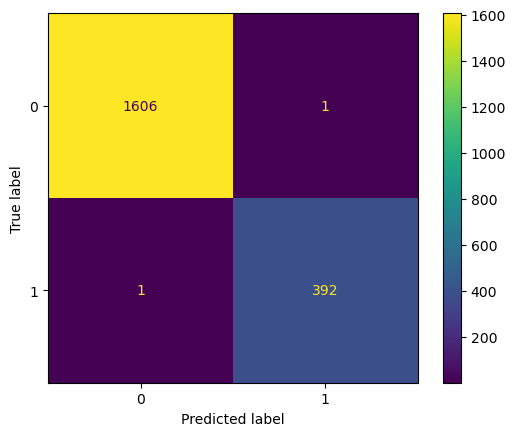

In [280]:
print(f"Model: {model_log.__class__.__name__}")
print(f"Accuracy: {accuracy_score(y_test, y_pred_log)}")
print(f"Classification Report:\n{classification_report(y_test, y_pred_log)}")
print(f"Confusion Matrix:\n")
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred_log), display_labels=[0, 1])
cm_display.plot()
plt.show()

### Observations from Logistic Regression Model Performance

1️. Model Accuracy & Performance

- The model achieved an accuracy of 99.9%, indicating near-perfect classification.
- Precision, Recall, and F1-score are all 1.00, suggesting no significant misclassifications.
- Macro and weighted averages are also 1.00, confirming consistent performance across both classes.

**Conclusion**: The model performs exceptionally well, but further checks are needed to ensure there is no overfitting.

2️. Confusion Matrix Analysis

- True Negatives (TN) = 1606 → The model correctly classified 1606 instances of class 0.
- False Positives (FP) = 1 → Only 1 instance was incorrectly classified as 1 when it was actually 0.
- False Negatives (FN) = 1 → Only 1 instance was incorrectly classified as 0 when it was actually 1.
- True Positives (TP) = 392 → The model correctly classified 392 instances of class 1.

**Conclusion**: The confusion matrix shows that misclassification is extremely low, making the model highly reliable.


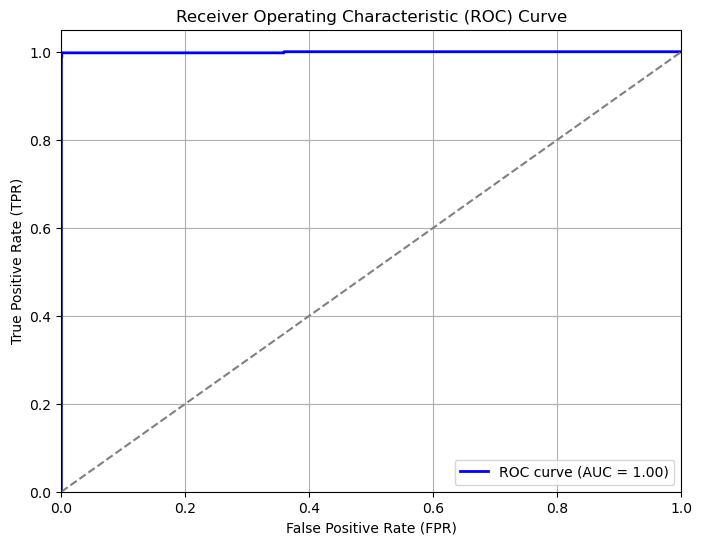

ROC AUC Score: 0.9991


In [281]:
# Get predicted probabilities for the positive class (class 1)
y_probs = model_log.predict_proba(x_test_selected)[:, 1]  # Use [:, 1] to get probabilities for class 1

# Compute ROC curve
fpr, tpr, _ = roc_curve(y_test, y_probs)

# Compute AUC (Area Under Curve)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Random classifier line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid()
plt.show()

# Print AUC Score
print(f"ROC AUC Score: {roc_auc:.4f}")


### observation of the ROC Curve and AUC Score
1️. Understanding the ROC Curve

- The Receiver Operating Characteristic (ROC) curve plots the True Positive Rate (TPR) against the False Positive Rate (FPR) at different classification thresholds.
- The blue curve represents the model's performance, while the diagonal dashed line represents a random classifier (AUC = 0.5).
- The model's curve reaches the top-left corner almost instantly, meaning it has very high sensitivity (recall) and specificity.

2️. AUC Score Interpretation

- The Area Under the Curve (AUC) = 0.9991, which is almost perfect.
- An AUC of 1.00 means the model is 100% capable of distinguishing between the two classes (Churn vs. Non-Churn).
- This suggests the model rarely makes mistakes when classifying data.

### **Summary of Logistic Regression's Success in This Case Study**

- Successfully predicted customer churn with high accuracy and interpretability.
- Allowed businesses to analyze key drivers of churn and take proactive measures.
- Demonstrated that even simple models can be highly effective in real-world applications.